In [1]:
import pandas as pd


fmts = ['png', 'eps', 'svg', 'pdf']
figkw = dict(dpi=300, transparent=True)


dfs = pd.read_csv('Data_PFAs_Soil.csv', skiprows=1, index_col=0).T
dfl = pd.read_csv('Data_PFAs_Leaves.csv', skiprows=1, index_col=0).T

In [2]:
# dfl = dfl[(dfl.T != 0).any()]  # Eliminate rows with all zeroes.
dfl = dfl.loc[:, (dfl != 0).any(axis=0)]  # Eliminate columns with all zeroes.

# dfs = dfs[(dfs.T != 0).any()]  # Eliminate rows with all zeroes.
dfs = dfs.loc[:, (dfs != 0).any(axis=0)]  # Eliminate columns with all zeroes.

In [3]:
dfl = dfl.reindex(sorted(dfl.columns), axis=1).iloc[::-1]
dfs = dfs.reindex(sorted(dfs.columns), axis=1).iloc[::-1]

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
prop = sorted(set(dfl.columns.tolist() + dfs.columns.tolist()))

len(colors), len(prop)

(10, 11)

We need 1 more color!

In [5]:
colors.insert(0, 'firebrick')

In [6]:
colors = dict(zip(prop, colors))
colors

{'Br-PFOS': 'firebrick',
 'L-FOSA': '#1f77b4',
 'L-PFOA ': '#ff7f0e',
 'L-PFOS': '#2ca02c',
 'PFDA': '#d62728',
 'PFDoDA': '#9467bd',
 'PFHpA': '#8c564b',
 'PFHxA': '#e377c2',
 'PFNA': '#7f7f7f',
 'PFTeDA': '#bcbd22',
 'PFUnDA': '#17becf'}

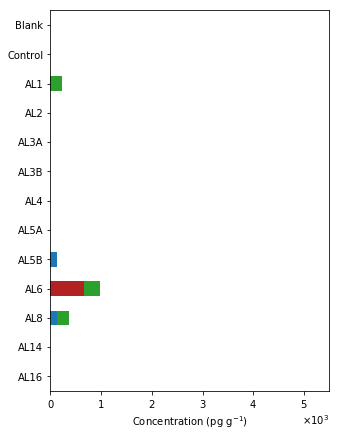

In [7]:
%matplotlib inline


fig, ax = plt.subplots(figsize=(5, 7))

dfl.plot.barh(ax=ax, stacked=True, legend=False,
              color=[colors[col] for col in dfl.columns])
ax.set_xlim(0, 5500)
ax.xaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.set_xlabel(r'Concentration (pg g$^{-1}$)')

for fmt in fmts:
    fig.savefig('barh_leaves.{}'.format(fmt), format=fmt, **figkw)

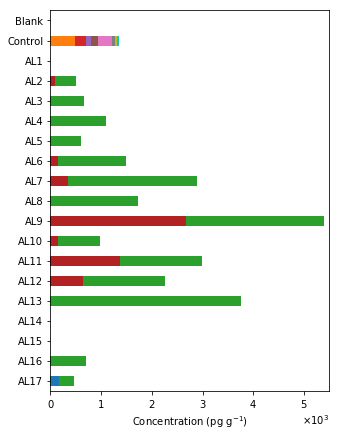

In [8]:
fig, ax = plt.subplots(figsize=(5, 7))

dfs.plot.barh(ax=ax, stacked=True, legend=False,
              color=[colors[col] for col in dfs.columns])
ax.set_xlim(0, 5500)
ax.xaxis.set_major_formatter(mtick.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax.set_xlabel(r'Concentration (pg g$^{-1}$)')

for fmt in fmts:
    fig.savefig('barh_soil.{}'.format(fmt), format=fmt, **figkw)

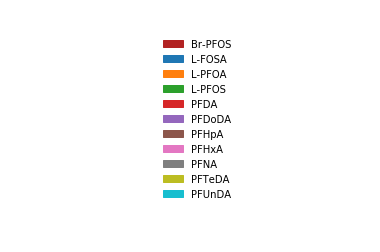

In [9]:
import matplotlib.patches as mpatches


patches = [
    mpatches.Patch(color=color, label=label)
    for label, color in colors.items()]

plt.legend(patches, colors.keys(), loc='center', frameon=False)
plt.axis('off')

for fmt in fmts:
    plt.savefig('barh_legend.{}'.format(fmt), format=fmt, **figkw)